## Convergence in distribution of QRGMM

In [1]:
%matplotlib inline

### Load required package

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression

### Prepare for the plots

In [3]:
n_set=(np.arange(2,17)*10)**2

In [4]:
m_set=(np.arange(2,17)*10)

In [5]:
KS_QRGMM_T1=pd.read_csv("./data_convergence/KS_QRGMM_TestProblem_1.csv")
KS_QRGMM_T2=pd.read_csv("./data_convergence/KS_QRGMM_TestProblem_2.csv")

In [6]:
X=n_set
Y1=np.array(KS_QRGMM_T1.mean(1))
Y2=np.array(KS_QRGMM_T2.mean(1))

logX=np.log10(X)
logY1=np.log10(Y1)
logY2=np.log10(Y2)


X_train = logX.reshape((len(logX), 1))
Y_train1 = logY1.reshape((len(logY1), 1))
Y_train2 = logY2.reshape((len(logY2), 1))


lineModel = LinearRegression()

lineModel.fit(X_train, Y_train1)
Y_predict1 = lineModel.predict(X_train)
coef1 = lineModel.coef_[0][0]
intercept1 = lineModel.intercept_[0]
R2_1=lineModel.score(X_train, Y_train1)
print("y=%.4f*x+%.4f" % (coef1,intercept1))
print("score", R2_1)

lineModel.fit(X_train, Y_train2)
Y_predict2 = lineModel.predict(X_train)
coef2 = lineModel.coef_[0][0]
intercept2 = lineModel.intercept_[0]
R2_2=lineModel.score(X_train, Y_train2)
print("y=%.4f*x+%.4f" % (coef2,intercept2))
print("score", R2_2)

y=-0.5054*x+0.0988
score 0.9987406439798456
y=-0.1964*x+-0.5075
score 0.9284577331752573


### Plot

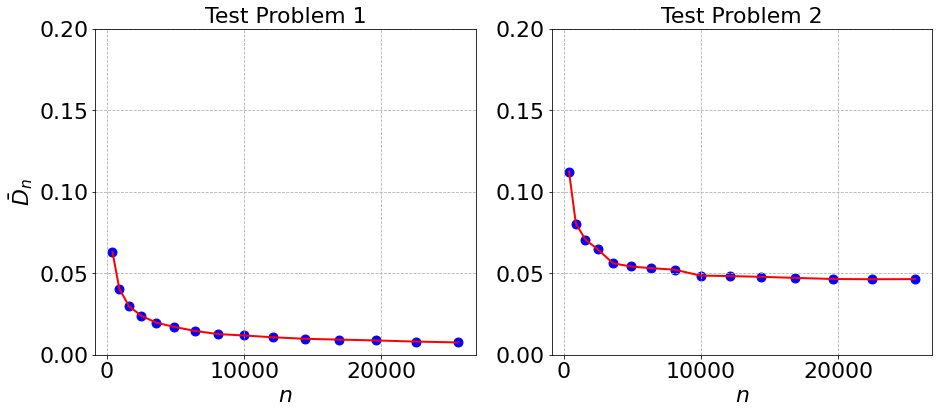

In [7]:
fig,a =  plt.subplots(1,2,figsize=(15, 6))

a[0].scatter(X, Y1, c="blue",s=80)
a[0].plot(X,Y1, c="red",linewidth=2)
a[0].set_ylim(0,0.2)
#a[0].set_xlim(0,42500)
a[0].tick_params(labelsize=22)
a[0].set_title("Test Problem 1",fontsize=22)
a[0].set_xlabel(r"$n$",fontsize=22)
a[0].set_ylabel(r"$\bar{D}_n$",fontsize=22)
a[0].grid(ls='--')

a[1].scatter(X, Y2, c="blue",s=80)
a[1].plot(X,Y2, c="red",linewidth=2)
a[1].set_ylim(0,0.2)
#a[1].set_xlim(0,42500)
a[1].tick_params(labelsize=22)
a[1].set_title("Test Problem 2",fontsize=22)
a[1].set_xlabel(r"$n$",fontsize=22)
#a[1].set_ylabel(r"$\bar{D}_n$",fontsize=18)
a[1].grid(ls='--')
os.makedirs("./plot", exist_ok=True) 
fig.savefig('./plot/D_vs_n_2in1.pdf',dpi=300)
plt.show()

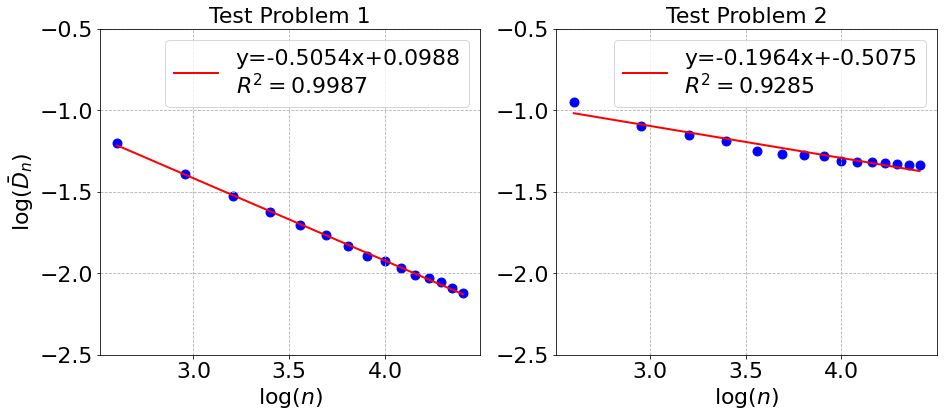

In [8]:
fig,a =  plt.subplots(1,2,figsize=(15, 6))

a[0].scatter(X_train, Y_train1, c="blue",s=80)
a[0].plot(X_train,Y_predict1, c="red",linewidth=2,label="y=%.4fx+%.4f\n" % (coef1,intercept1)+r"$R^2=%.4f$"%R2_1)
a[0].set_ylim(-2.5,-0.5)
#a[0].set_xlim(0,42500)
a[0].tick_params(labelsize=22)
a[0].set_title("Test Problem 1",fontsize=22)
a[0].set_xlabel(r"log($n$)",fontsize=22)
a[0].set_ylabel(r"log($\bar{D}_n$)",fontsize=22)
a[0].legend(fontsize=22)
a[0].grid(ls='--')

a[1].scatter(X_train, Y_train2, c="blue",s=80)
a[1].plot(X_train,Y_predict2, c="red",linewidth=2,label="y=%.4fx+%.4f\n" % (coef2,intercept2)+r"$R^2=%.4f$"%R2_2)
a[1].set_ylim(-2.5,-0.5)
#a[1].set_xlim(0,42500)
a[1].tick_params(labelsize=22)
a[1].set_title("Test Problem 2",fontsize=22)
a[1].set_xlabel(r"log($n$)",fontsize=22)
#a[1].set_ylabel(r"lg($\bar{D}_n$)",fontsize=18)
a[1].legend(fontsize=22)
a[1].grid(ls='--')

fig.savefig('./plot/logD_vs_logn_2in1.pdf',dpi=300)
plt.show()